
## Importing drive



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!apt-get install p7zip-full
!p7zip -d /content/drive/MyDrive/CropDataset.7z

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-8).
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.

7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,96 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/MyDrive/                                 1 file, 1362482358 bytes (1300 MiB)

Extracting archive: /content/drive/MyDrive/CropDataset.7z
--
Path = /content/drive/MyDrive/CropDataset.7z
Type = 7z
Physical Size = 1362482358
Headers Size = 1779618
Method = LZMA2:24
Solid = +
Blocks = 1

  0%      0% 79         0% 379 - CropDataset/train/Apple___Apple_ . 9dc3aff8d29___FREC_Scab 3503.JPG

In [ ]:
print(tf.__version__)

2.17.0


## Importing Libraries

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Loading Model

In [3]:
model = tf.keras.models.load_model('/content/drive/MyDrive/crop_disease_model.keras')

In [4]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

## Visualizing Single Image of Test Set

In [6]:
!pip install opencv-python

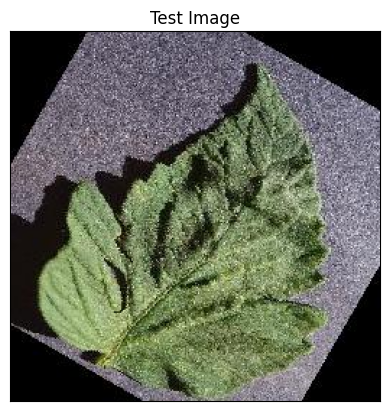

In [35]:
import cv2
image_path = "/content/drive/MyDrive/test/test/TomatoHealthy3.JPG"

#Reading Image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Displaying Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

### Testing Model

In [36]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) # converting a single image to a batch
print(input_arr, input_arr.shape)

[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]] (1, 128, 128, 3)


In [37]:
prediction = model.predict(input_arr)
print(prediction, prediction.shape)

1/1 [==============================] - 0s 38ms/step
[[6.9241820e-16 1.7151551e-18 4.0838457e-16 1.0336072e-14 1.8772249e-16
  4.1700977e-13 7.4776635e-16 3.5422339e-18 3.9451711e-14 2.4061357e-21
  4.6478353e-19 3.5976399e-21 1.2512314e-16 8.2713166e-21 2.1734921e-18
  2.8053019e-19 7.0969541e-18 1.8507649e-18 3.5936109e-19 4.7178666e-16
  1.9343114e-12 4.8220820e-19 2.6478708e-13 6.0327215e-17 5.5902872e-16
  1.5751501e-13 1.3640648e-18 9.9154391e-17 1.3872063e-18 4.4285758e-17
  1.3911786e-10 1.4192962e-14 9.0334465e-14 1.0476056e-18 7.7693709e-09
  5.4682580e-21 7.8674617e-17 1.0000000e+00]] (1, 38)


In [38]:
result_index = np.argmax(prediction)
print(result_index)

37


### Loading training/validation set to know the class names

In [16]:
valid_dir = "./CropDataset/valid"
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    valid_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
)

Found 17572 files belonging to 38 classes.


In [22]:
class_names = validation_dataset.class_names
print('\n'.join(class_names))
print(f"\nNumber of classes: {len(class_names)}")

Apple___Apple_scab
Apple___Black_rot
Apple___Cedar_apple_rust
Apple___healthy
Blueberry___healthy
Cherry_(including_sour)___Powdery_mildew
Cherry_(including_sour)___healthy
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Corn_(maize)___Common_rust_
Corn_(maize)___Northern_Leaf_Blight
Corn_(maize)___healthy
Grape___Black_rot
Grape___Esca_(Black_Measles)
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Grape___healthy
Orange___Haunglongbing_(Citrus_greening)
Peach___Bacterial_spot
Peach___healthy
Pepper,_bell___Bacterial_spot
Pepper,_bell___healthy
Potato___Early_blight
Potato___Late_blight
Potato___healthy
Raspberry___healthy
Soybean___healthy
Squash___Powdery_mildew
Strawberry___Leaf_scorch
Strawberry___healthy
Tomato___Bacterial_spot
Tomato___Early_blight
Tomato___Late_blight
Tomato___Leaf_Mold
Tomato___Septoria_leaf_spot
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Target_Spot
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Tomato_mosaic_virus
Tomato___healthy

Number of class

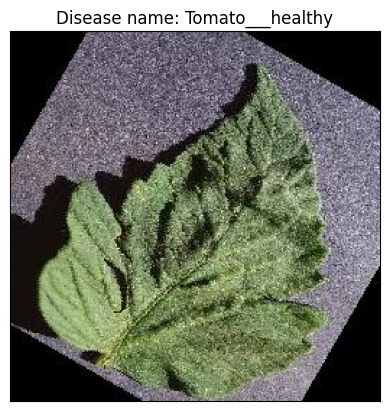

Model Prediction: Tomato___healthy


In [39]:
#displaying result of disease detection
model_prediction = class_names[result_index]
plt.imshow(img)
plt.title(f"Disease name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()
print(f"Model Prediction: {model_prediction}")